# Machine Learning - Regression

## Setup and Loading Packages

In [1]:
# Import relevant packages
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## What is Linear Regression?

Linear regression relates a continuous response (dependent) variable to one or more predictors (features/ independent variables). Here are the necessary assumptions:

<b>Linearity:</b> The relationship between the dependent variable and the independent variables should be linear. 

<b>Independence:</b> The observations should be independent of each other. This means that there should be no correlation or relationship between the residuals of the regression model.

<b>Homoscedasticity:</b> The variance of the residuals should be constant across all levels of the independent variables. In other words, the spread of the residuals should be consistent throughout the range of the independent variables.

<b>Normality:</b> The residuals should follow a normal distribution. This assumption allows for valid statistical inference and hypothesis testing. 

<b>No multicollinearity:</b> The independent variables should not be highly correlated with each other. High multicollinearity can make it difficult to distinguish the individual effects of the independent variables on the dependent variable.

<b>No endogeneity:</b> There should be no correlation between the independent variables and the residuals. Endogeneity occurs when the error term is correlated with one or more of the independent variables, which can bias the coefficient estimates and lead to inaccurate results.

## Predicting Returns with Multiple Linear Regression

We compiled a list of features for building our linear model for predicting the performance of a the Russell 2000 ETF (Ticker: IWM). These features include ETFs considering Environmental, Social and Governance (ESG) factorsm along with some economic indicatiors.

<b>Technology Breakthrough:</b>
<ul>
  <li>IBLC</li>
  <li>IRBO</li>
  <li>IHAK</li>
</ul>
<b>Social Change:</b>
<ul>
  <li>IDNA</li>
  <li>IWFH</li>
  <li>BMED</li>
</ul>
<b>Urbanization:</b>
<ul>
  <li>IFRA</li>
  <li>IGF</li>
  <li>EMIF</li>
</ul>
<b>Climate Change:</b>
<ul>
  <li>ICLN</li>
  <li>IDRV</li>
  <li>IVEG</li>
</ul>
<b>Global Wealth:</b>
<ul>
  <li>CNYA</li>
</ul>
<b>Economic Indicators:</b>
<ul>
  <li>volatility_index</li>
  <li>option_adjusted_spread</li>
  <li>inflation_rate</li>
</ul>


<p style="color:red;"> After processing the data (e.g., removing outliers, missing values, unimportant features), we end up having just 2 features in our dataset - BMED and IVEG log returns. So let's take the shortcut and pull in data for just these two assets.</p>

In [2]:
ETF_TICKERS = ['BMED', 'IVEG', 'IWM'] # Enter the ETF ticker symbols here
START_DATE = '2022-06-01' # ETF data start date
END_DATE = '2023-06-01' # ETF data end date

In [3]:
etfPxList = yf.download(ETF_TICKERS, START_DATE, END_DATE)['Adj Close'] # Retrieve ETF adjusted close price data from yahoo finance
DATA = np.log(etfPxList).diff().dropna() # Calculate log returns and drop null values

[*********************100%***********************]  3 of 3 completed


### Multiple Linear Regression

<i> Visualizing 3D scatterplot before model fitting </i>

Text(0.5, 0.92, 'BMED vs IVEG vs IWM Log Returns Before Fit')

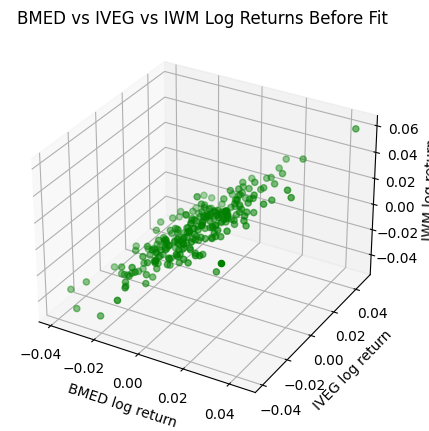

In [4]:
# Plot 3D scatterplot before model fitting
three_dee = plt.figure(figsize=(10, 5)).add_subplot(projection = '3d')
three_dee.scatter(DATA.BMED, DATA.IVEG, DATA.IWM, c='g') # plot scatter plot
three_dee.set_xlabel("BMED log return") # Label x-axis
three_dee.set_ylabel("IVEG log return") # Label y-axis
three_dee.set_zlabel("IWM log return") # Label z-axis
three_dee.set_title('BMED vs IVEG vs IWM Log Returns Before Fit') # Label title

Our model has two independent variables, so its regression formula looks something like this:

IWM log return = $\hat{\beta_0}$ + $\hat{\beta_1}$ * (BMED log return) + $\hat{\beta_2}$ * (IVEG log return) + $\epsilon$, where<br>

$\hat{\beta_0}$ = IWM log return when both BMED and IVEG log returns are 0<br>
$\hat{\beta_1}$ = Estimated effect of BMED log return on IWM log return<br>
$\hat{\beta_2}$ = Estimated effect of IVEG log return on IWM log return<br>
$\epsilon$ = Error or noise which are not captured by the model<br>

Let's estimate a multiple linear regression with the sklearn package.

In [5]:
linear_model = LinearRegression() # Declare linear regression model

RESPONSE = 'IWM' # Response variable
FEATURES = ['BMED', 'IVEG'] # Explanatory variable
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(DATA.loc[:, FEATURES], DATA.loc[:, RESPONSE], test_size=0.2, random_state=0)

linear_model = linear_model.fit(X_train, y_train) # Fit linear regression model

print('intercept: ', linear_model.intercept_) # Print estimated intercept
print('coefficients: ', linear_model.coef_) # Print estimated coefficients

intercept:  0.0003421169437068417
coefficients:  [0.69826692 0.541223  ]


Let's get model summary with the statsmodels package - the estimation result here should be close, if not the same, as what's produced from the sklearn package estimation above.

In [6]:
X_ols = sm.add_constant(X_train) # Add constant term to linear regression model
statsmodel = sm.OLS(y_train, X_ols).fit() # Fit linear regression model
print(statsmodel.summary()) # Print linear regression model diagnostics

                            OLS Regression Results                            
Dep. Variable:                    IWM   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     709.1
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           9.93e-91
Time:                        16:09:40   Log-Likelihood:                 752.75
No. Observations:                 200   AIC:                            -1500.
Df Residuals:                     197   BIC:                            -1490.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.850      0.3

We would now evaluate the goodness of fit of the model with some metrics from the sklearn package. We do this by fitting the multiple linear regression model on our test data.<br>

Here, we outputted 4 metrics to evaluate the performance of the multiple linear regression model: 1) R-squared, 2) Adjusted R-squared, 3) MAE, 4) RMSE. Notice that the metric values are different from what's computed above because we are fitting our model on the testing data here instead of the training data.

In [8]:
y_test_pred_multi = linear_model.predict(X_test) # Get model predictions

print('R-squared: ', r2_score(y_test, y_test_pred_multi)) # Print R-squared
print('Adjusted R-squared: ',1 - (1-r2_score(y_test, y_test_pred_multi)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)) # Print adjusted R-squared
print('MAE: ', mean_absolute_error(y_test, y_test_pred_multi)) # Print Mean Absolute Error
print('RMSE: ', mean_squared_error(y_test, y_test_pred_multi, squared=False)) # Print Root Mean Squared Error

R-squared:  0.83919279254024
Adjusted R-squared:  0.8323499326483353
MAE:  0.004000509224030821
RMSE:  0.0054670890384517085
